In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_pickle("../../datasets/topoprocessed/train.pkl")
sig_train = df_train.loc[df_train['is_signal_new'] == 1, df_train.columns != 'is_signal_new']
bkg_train = df_train.loc[df_train['is_signal_new'] == 0, df_train.columns != 'is_signal_new']
del df_train


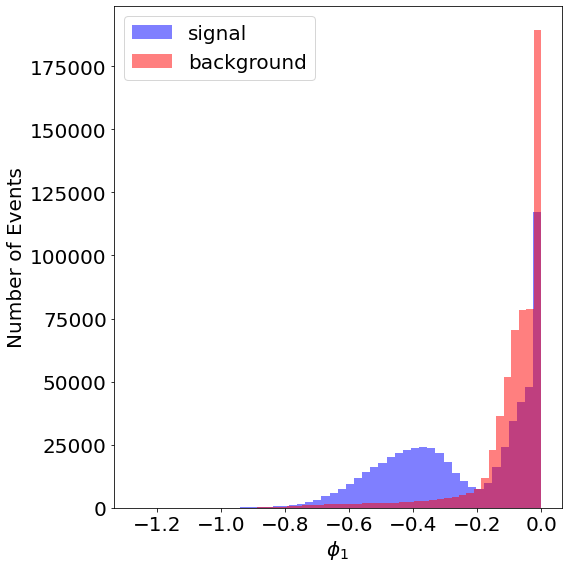

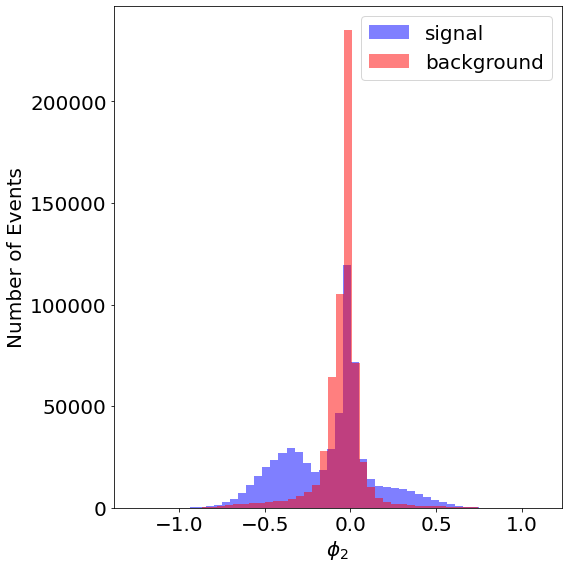

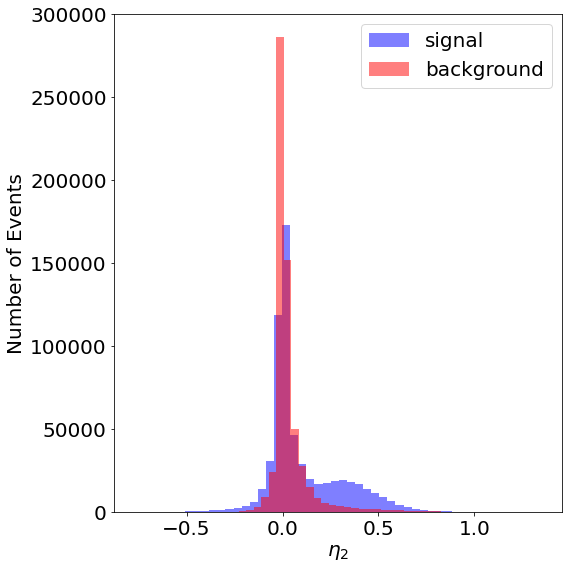

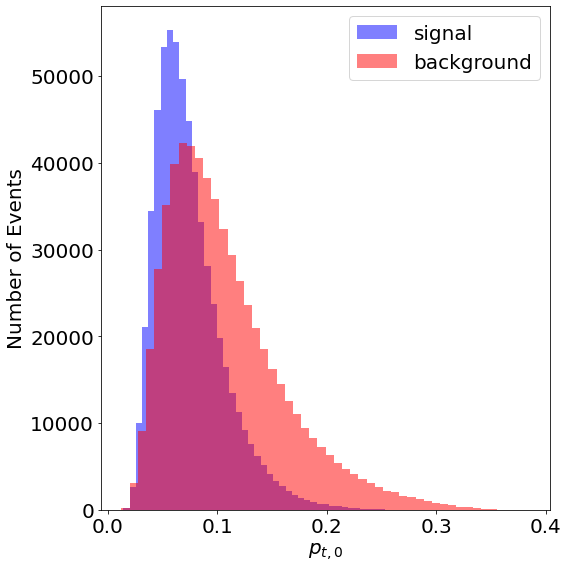

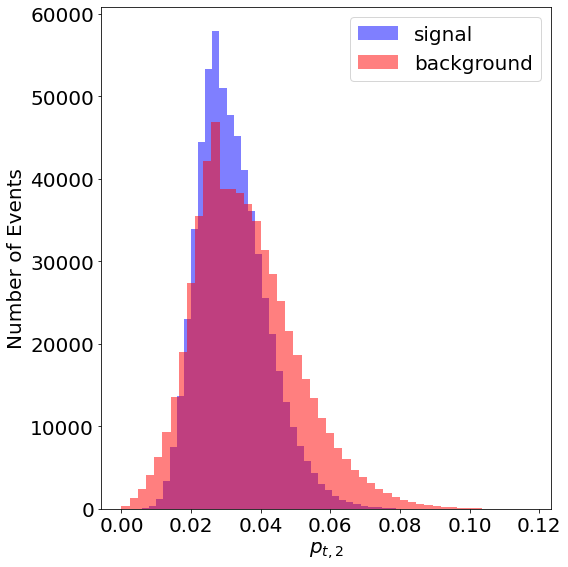

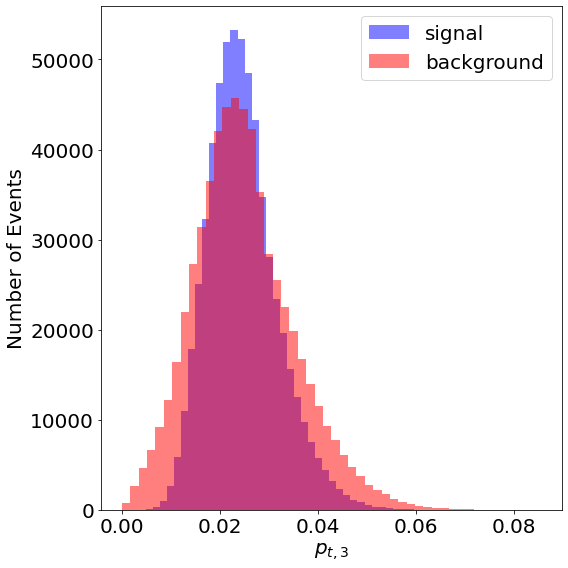

In [3]:
#Calculate Histograms of Train/Test/Val Feature Distributions

feats_to_plot = ['phi_1', 'phi_2', 'eta_2', 'pt_0', 'pt_2', 'pt_3']
for feat in feats_to_plot:
    plt.figure(figsize=(8,8))
    plt.hist(sig_train.iloc[:, sig_train.columns==feat], bins = 50, 
             label = 'signal', alpha=0.5, color='blue')
    plt.hist(bkg_train.iloc[:, bkg_train.columns==feat], bins = 50, 
             label = 'background', alpha=0.5, color='red')
    
    tag = feat
    if 'pt' in feat:
        feat = feat.replace('_','').replace('pt','p_{t,') + '}'
    feat = '$' + feat.replace('phi', '\phi').replace('eta', '\eta') + '$' 
    
    plt.xlabel(feat, fontsize=20)
    plt.ylabel("Number of Events", fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(fontsize = 20)
    plt.tight_layout()
    plt.savefig("figures/FeatDist_TopoDNN_{}.png".format(tag))